# Morphology Tutorial

Mathematical morphology (MM) is a theoretical model for digital images built upon lattice theory and topology. It is the foundation of morphological image processing, which is based on shift-invariant (translation invariant) operators.Originally developed for binary images it has now been successfully extend to grey scale images.

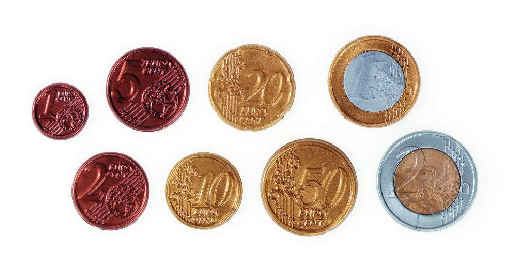

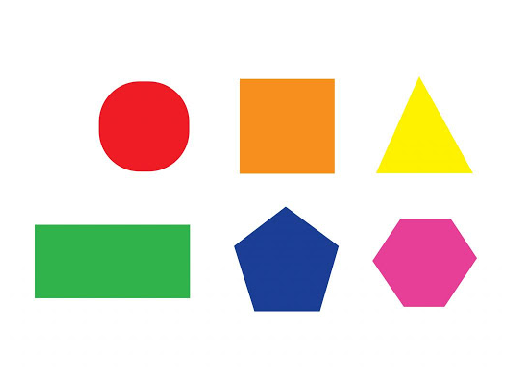

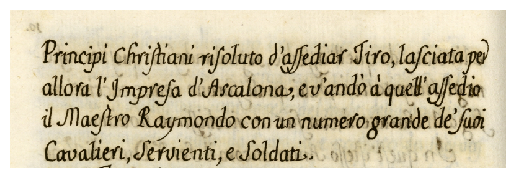

In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

#Loading Images
images = {}
for x in os.listdir("images"):
    images[x] = cv2.imread("images/" + x)
    images[x]= images[x][:,:,::-1]
    plt.imshow(images[x], interpolation='nearest')
    plt.axis("off")
    plt.show() 

## The following functions will be used throughout:

### Function which prints a list of image

In [2]:
def PrintImages(images):
    #Looping through all the images
    for imageName, image in images.items():
        plt.imshow(image, interpolation='nearest' ,cmap="gray")
        plt.title("Image: "+imageName)
        plt.axis("off")
        plt.show()

### Function which draws a histogram

In [3]:
def DrawHistogram(images):
    #Looping through all the images
    for imageName, image in images.items():
        hist = cv2.calcHist([image],[0],None,[256],[0,256])
        plt.plot(hist) 
        plt.title("Image: "+imageName)
        plt.show()

<b style="font-size:18px;">Exercise 1.0 - Connected Components</b>

Using opencv research how to use connectedComponents() function.  
Download image shapes.jpg and euro_coins.jpg. Apply the connected components function to segment the objects in the image. You can if you want also use the findContour() opencv method to extract the ROI (seperate shapes as new images). Vary the connectivity value (4 or 8) and document results. 

<i style="color:red">Do not forget to convert the image to binary, your objects should be white.</i>



### Converting the images to grayScale utilising the cv2.cvtColor function, and storing result in a dictionary

In [4]:
grayscaleImages={}
for imageName, image in images.items():
    grayscaleImages[imageName]= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

### Displaying grayScale Images

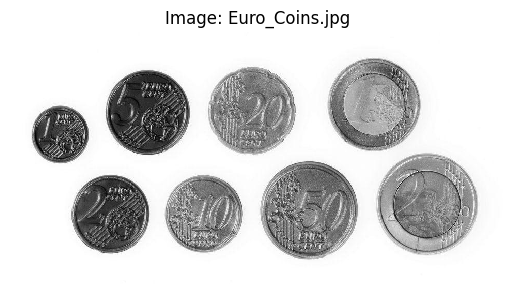

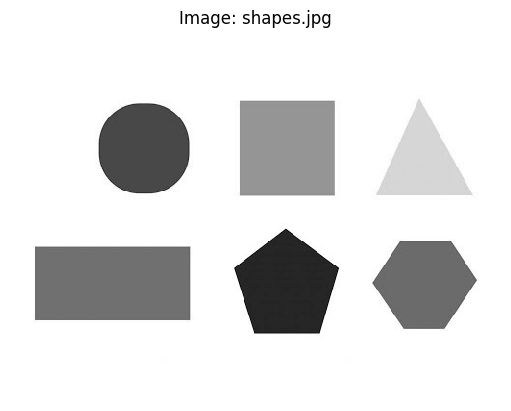

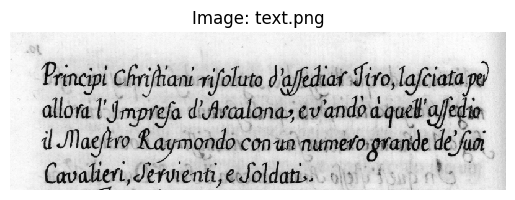

In [5]:
PrintImages(grayscaleImages)

### Thresholding the images, and storing result in a dictionary

In [6]:
thresholdedImages={}
for imageName, image in grayscaleImages.items():
    #Utilising cv2.threshold function
    thresholdedImages["Thresholded "+imageName]= cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)[1]

### Function which applies the Connected Components

In [7]:
def ConnectedComponents(image,connectivity):
    #Utilising cv2.threshold function
    thresh = cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    #Utilising cv2.connectedComponents function
    return  cv2.connectedComponents(thresh, connectivity=connectivity)[1]

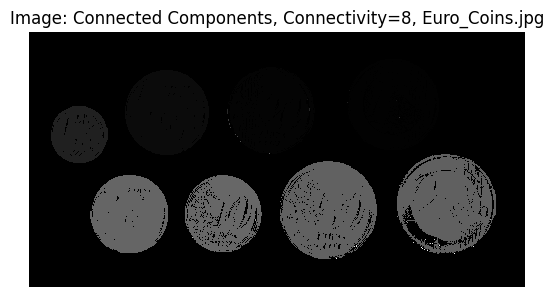

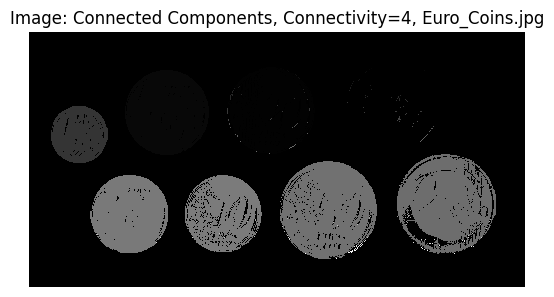

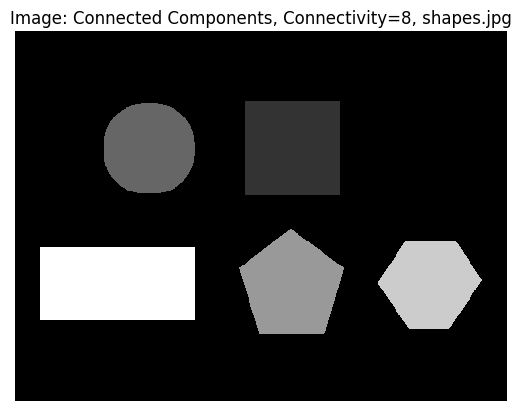

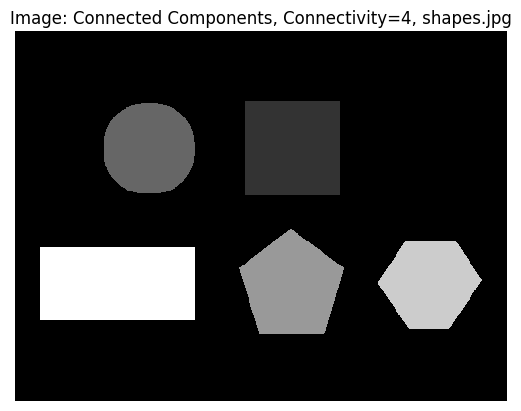

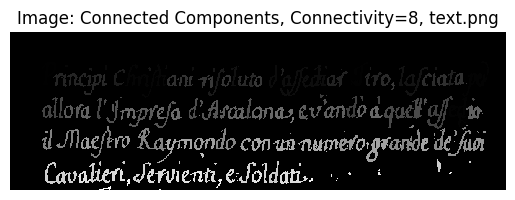

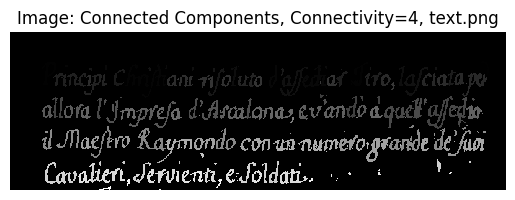

In [8]:
#Applying Functions on all the images with the 4 and 8 Connectivity list
for imageName, image in grayscaleImages.items():
    #Creating a dictionary which will store the connected components images
    connectedComponents={}
    connectedComponents["Connected Components, Connectivity="+str(8)+", "+imageName]= ConnectedComponents(image,8)
    connectedComponents["Connected Components, Connectivity="+str(4)+", "+imageName]= ConnectedComponents(image,4)
    PrintImages(connectedComponents)  

<b style="font-size:18px;">Exercise 1.1 - Dilation</b>

Download the image file handwritten text.png from VLE. Apply the opencv method for dilation (dilate()). Vary the dilation filter and compare results using histograms. What can you observe?

### Function which applies Dilation

In [9]:
def Dilation(image,matrixSize):
    #Calculating kernel
    kernel = np.ones((matrixSize, matrixSize), 'uint8')
    #Utilising cv2.dilate function
    return cv2.dilate(image,kernel, iterations=1)

### Applying Functions on the thresholded text.png image with different matrix sizes

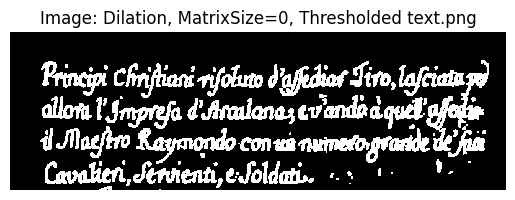

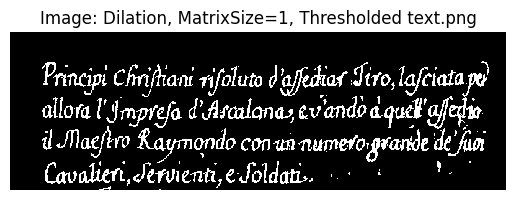

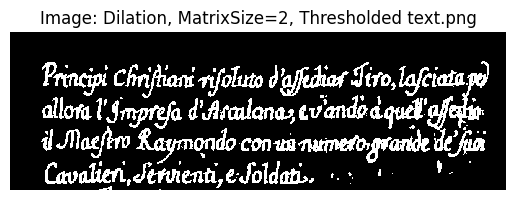

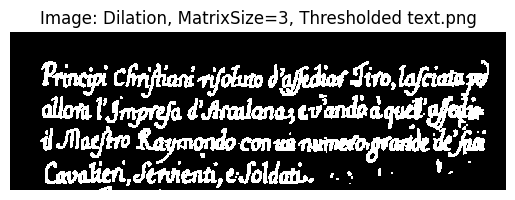

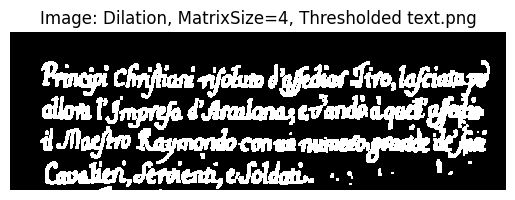

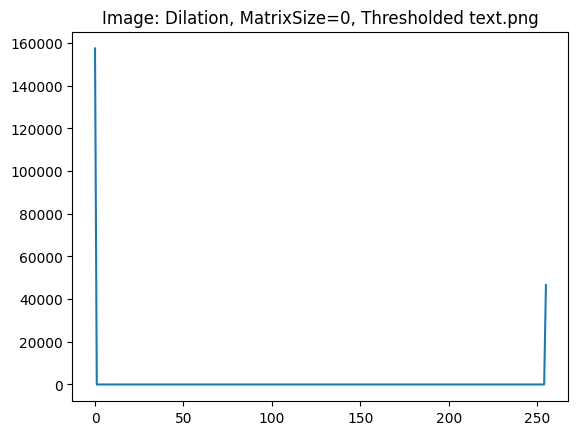

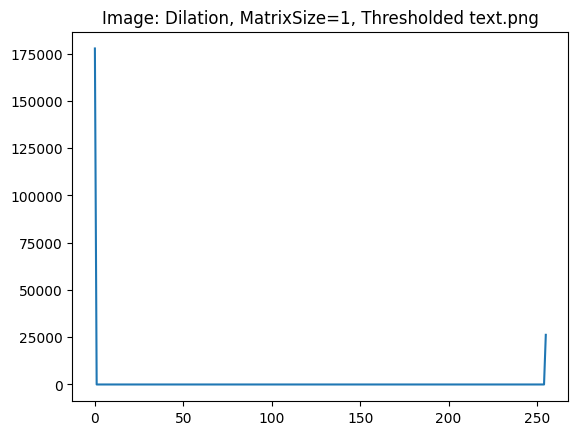

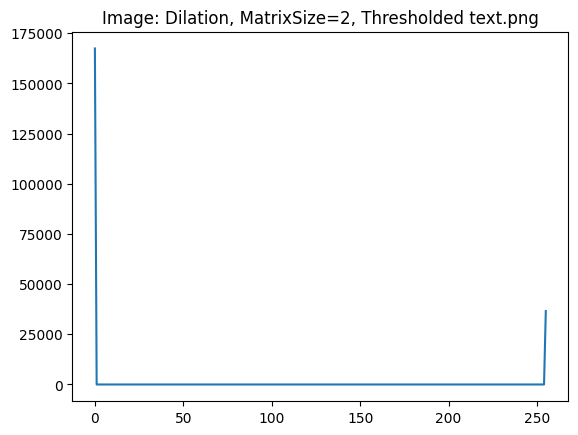

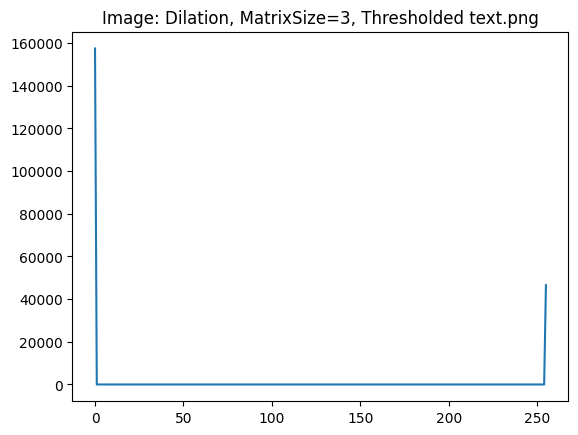

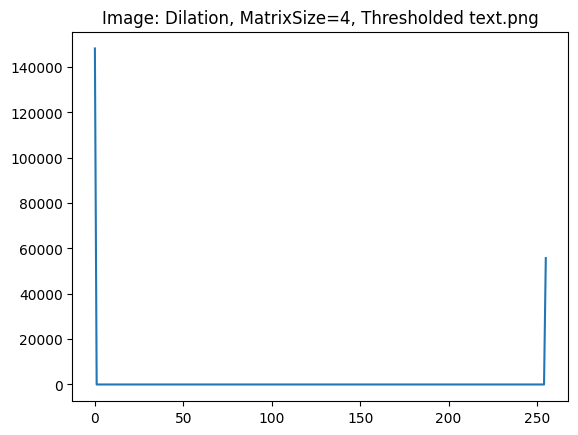

In [10]:
#Creating a dictionary which will store the dilated images
dilation={}
imageName="Thresholded text.png"
image=thresholdedImages[imageName]
#Looping through different matrix sizes
for i in range(5):
    dilation["Dilation, MatrixSize="+str(i)+", "+imageName]= Dilation(image,i)
#Applying the respective functions
PrintImages(dilation)
DrawHistogram(dilation)

<b style="font-size:18px;">Exercise 1.2 - Erosion</b>

Using the same text based image from the previous exercise apply the opencv method for erosion (erode()). Vary the erosion filter and compare results using histograms. What can you observe?

### Function which applies Erosion

In [11]:
def Erosion(image,matrixSize):
    #Calculating kernel
    kernel = np.ones((matrixSize, matrixSize), 'uint8')
    #Utilising cv2.erode function
    return cv2.erode(image,kernel)

### Applying Functions on the thresholded text.png image with different matrix sizes

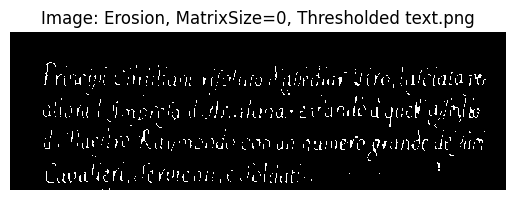

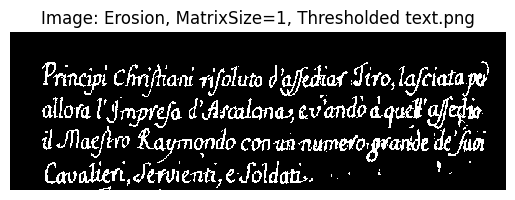

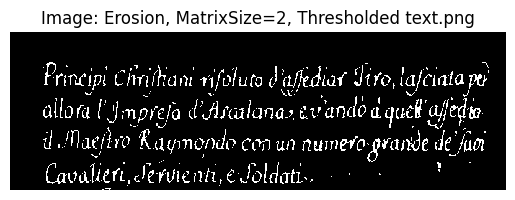

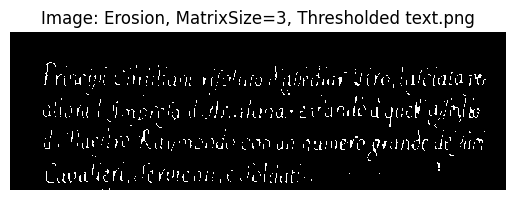

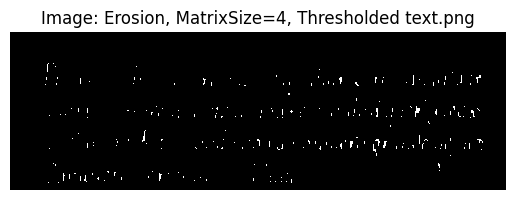

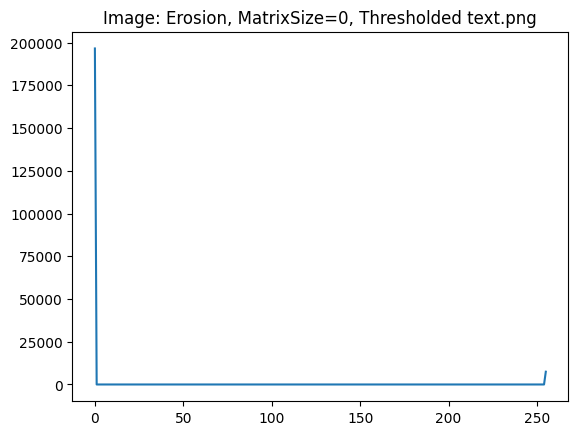

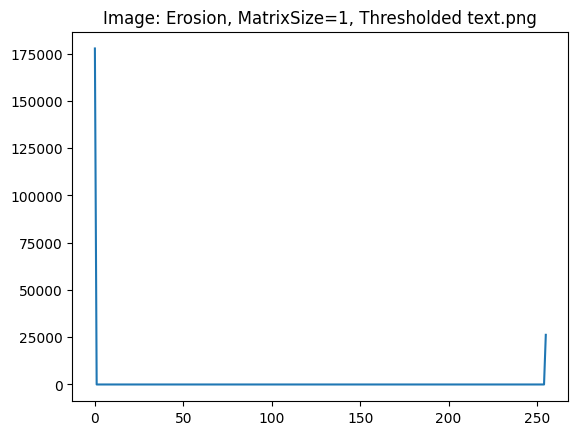

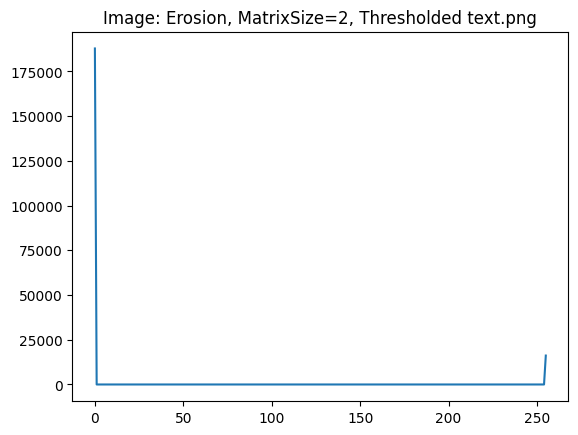

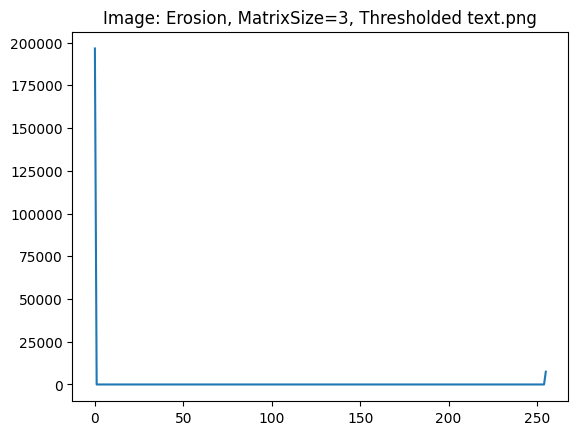

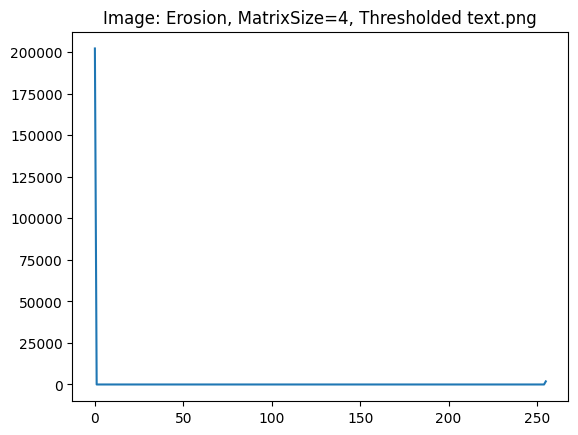

In [12]:
#Creating a dictionary which will store the eroded images
erosion={}
imageName="Thresholded text.png"
image=thresholdedImages[imageName]
#Looping through different matrix sizes
for i in range(5):
    erosion["Erosion, MatrixSize="+str(i)+", "+imageName]= Erosion(image,i)
#Applying the respective functions
PrintImages(erosion)
DrawHistogram(erosion)

<b style="font-size:18px;">Exercise 1.3 - Opening</b>

Opening is an applied process of erosion followed by dilation. It is typically used to segment neck parts of shapes found within an image. 

It is also used in Text segmentation to seperate lines and words and sometimes characters.
Using the same text image from previous exercises apply this process of opening to visually separate lines words and characters.


### Function which applies Opening

In [13]:
def Opening(image,matrixSize):
    #Calculating kernel
    kernel = np.ones((matrixSize, matrixSize), 'uint8')
    #Utilising cv2.morphologyEx function with the parameter of cv2.MORPH_OPEN , which essentially applies erosion followed by dilation
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

### Applying Functions on the thresholded text.png image with different matrix sizes

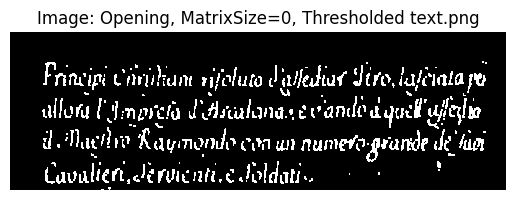

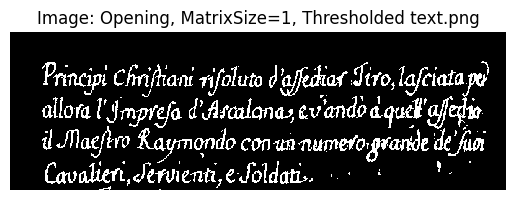

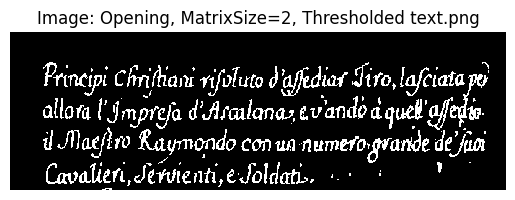

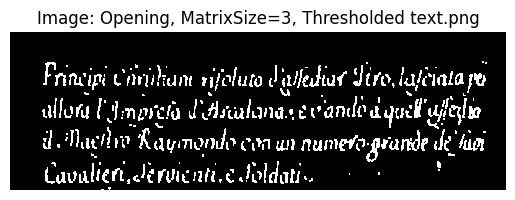

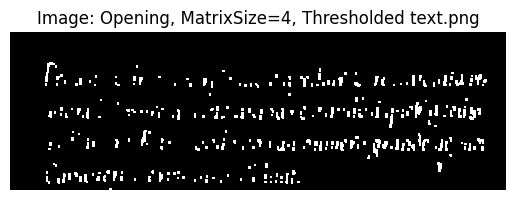

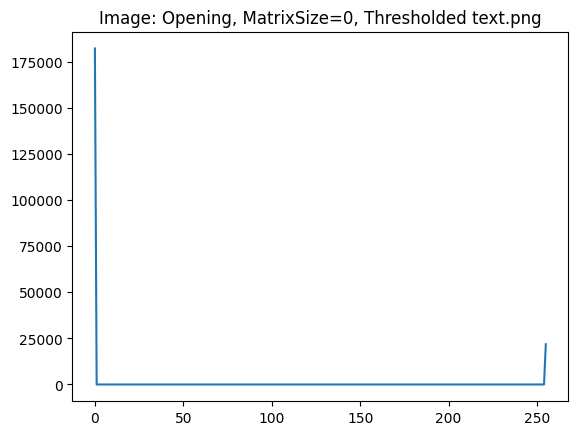

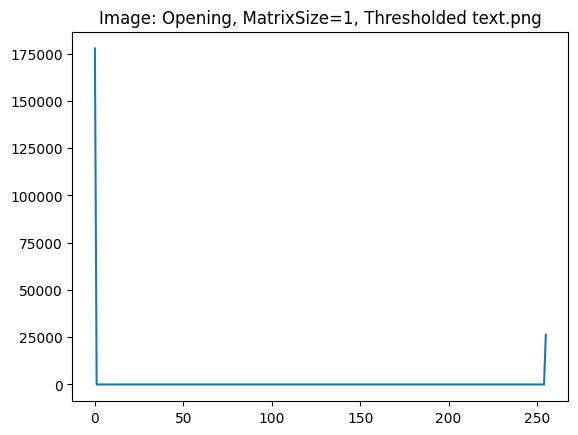

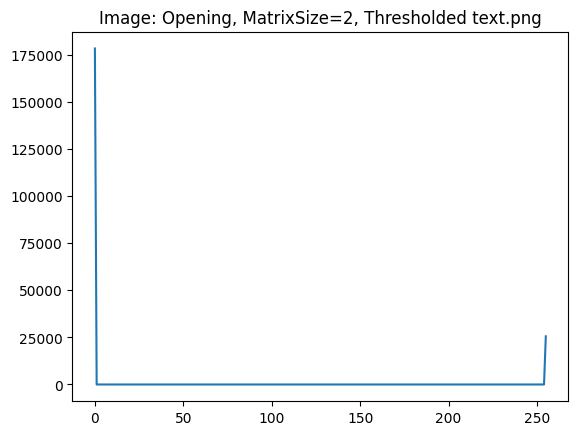

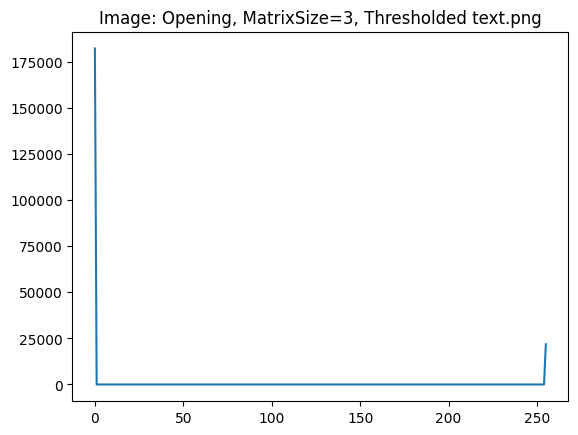

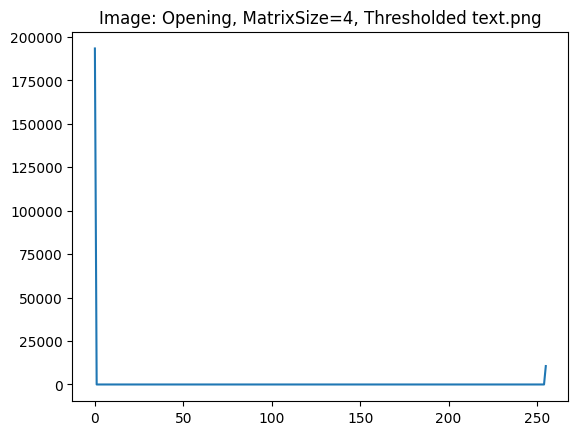

In [14]:
#Creating a dictionary which will store the opened images
opening={}
imageName="Thresholded text.png"
image=thresholdedImages[imageName]
#Looping through different matrix sizes
for i in range(5):
    opening["Opening, MatrixSize="+str(i)+", "+imageName]= Opening(image,i)
#Applying the respective functions
PrintImages(opening)
DrawHistogram(opening)

<b style="font-size:18px;">Exercise 1.4 - Closing</b>

Closing is an applied process of dilation followed by erosion. It is typically used to fill in shapes found within an image. It is also used in Text segmentation to reinforce eroded characters.

Using the same text image from previous exercises apply this process of opening to visually separate lines words and characters.


### Function which applies Closing

In [15]:
def Closing(image,matrixSize):
    #Calculating kernel
    kernel = np.ones((matrixSize, matrixSize), 'uint8')
    #Utilising cv2.morphologyEx function with the parameter of cv2.MORPH_CLOSE , which essentially applies dilation followed by erosion
    return cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

### Applying Functions on the thresholded text.png image with different matrix sizes

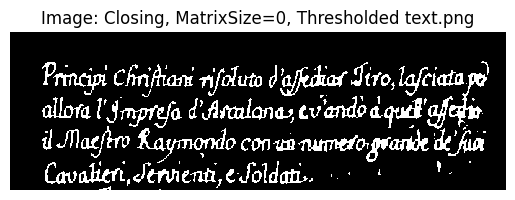

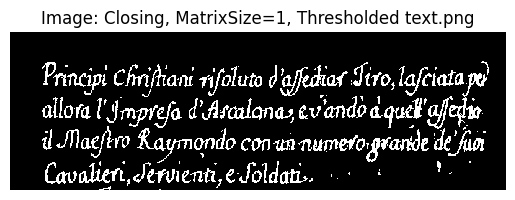

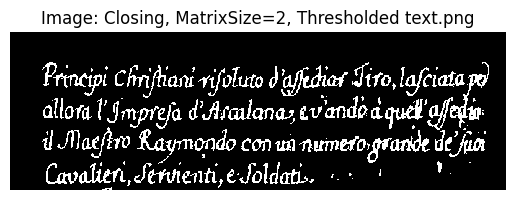

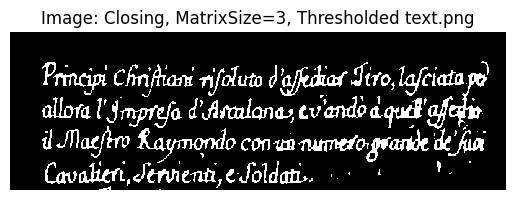

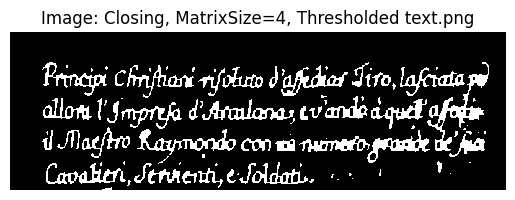

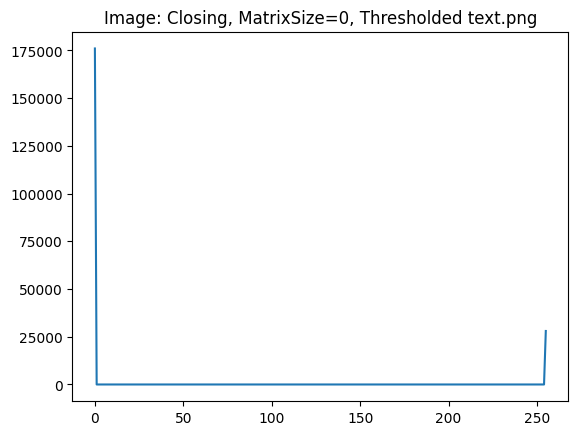

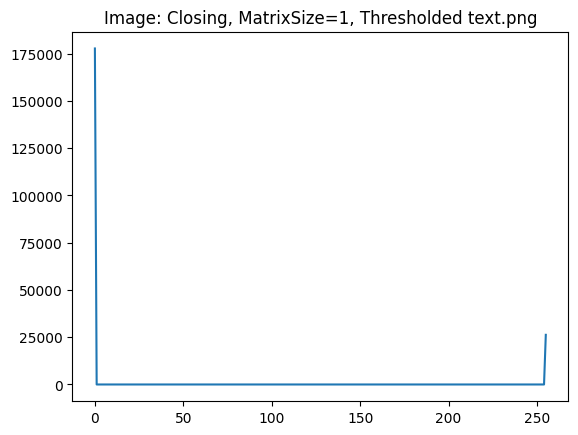

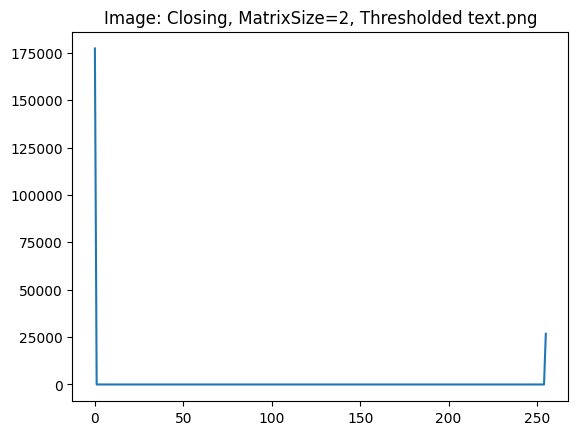

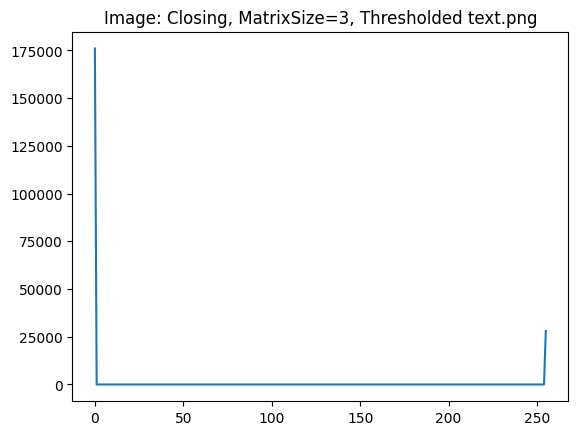

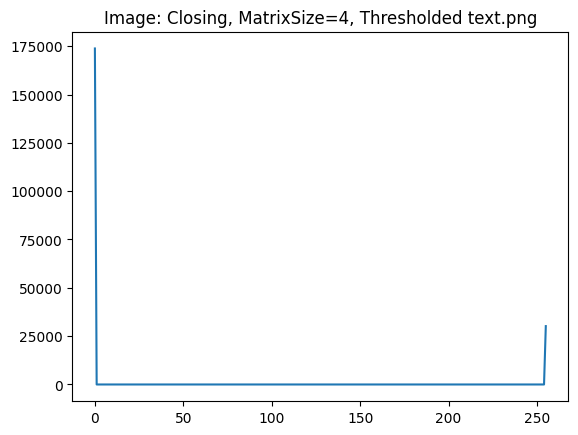

In [16]:
#Creating a dictionary which will store the closed images
closing={}
imageName="Thresholded text.png"
image=thresholdedImages[imageName]
#Looping through different matrix sizes
for i in range(5):
    closing["Closing, MatrixSize="+str(i)+", "+imageName]= Closing(image,i)
#Applying the respective functions
PrintImages(closing)
DrawHistogram(closing)

<b style="font-size:18px;">Exercise 1.5 - Segmentation</b>

Using histograms, apply any of the morphological techniques used in the previous exercises to try and segment the text into seperate lines. The lines do not have to be perfect. 

### Applying different Morphology Techniques to Segment the Image

Inspired from [1].

In [17]:
#Creating a dictionary which will store the segmented images
segmentation={}
imageName="Thresholded text.png"
image=thresholdedImages[imageName]

#Applying different morphology techniques with kernesl of different size (note that the order of  the following kernesl produced
#the best results, through extensive testing
kernel = np.ones((11, 1), 'uint8')
erosion = cv2.erode(image,kernel)
kernel = np.ones((8, 40), np.uint8)
dilated = cv2.dilate(erosion, kernel, iterations = 1)
kernel = np.ones((15, 1), 'uint8')
erosion = cv2.erode(dilated,kernel)
kernel = np.ones((15, 40), np.uint8)
dilated = cv2.dilate(erosion, kernel, iterations = 1)
#Adding segmented Image to the list
segmentation["Segmented Image"]=dilated


#Calculating line Contours and Hierarchy, through the cv2.findContours function
(contours, hierarchy) = cv2.findContours(segmentation["Segmented Image"].copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
#Sorting the line Contours
lineContours = sorted(contours, key = lambda ctr : cv2.boundingRect(ctr)[1])

#Dictionary which will hold the different lines
imageLines={}

#Storing a copy of the original image
segmentation["Line Contours"]= images["text.png"].copy()

#Iterating through all the line Contours
for count,contours in enumerate(lineContours):
    #Utilising cv2.boundingRect to draw an approximate rectangle around an image
    x,y,w,h = cv2.boundingRect(contours)
    #Storing the respective results
    imageLines["Segmented Line "+str(count+1)]=segmentation["Line Contours"][y:y+h, x: x+w]
    #Drawing rectangle for ROI of current line Contour
    cv2.rectangle(segmentation["Line Contours"], (x,y), (x+w, y+h), (40, 100, 250), 2)

### Displaying Segmented Images

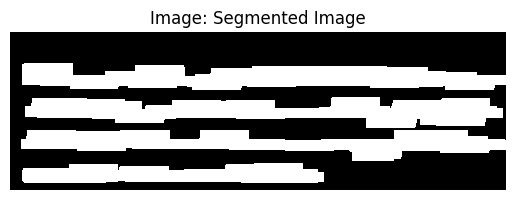

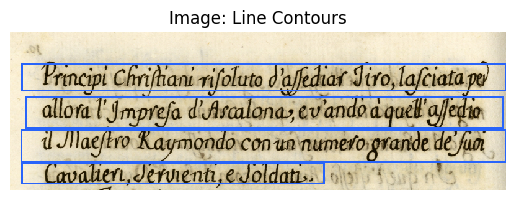

In [18]:
PrintImages(segmentation)

### Displaying the respective Line Segments

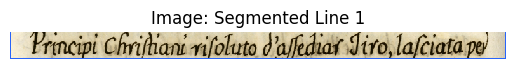

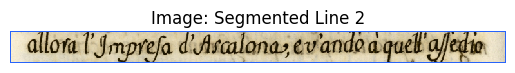

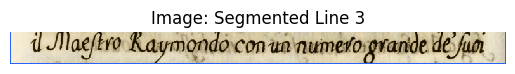

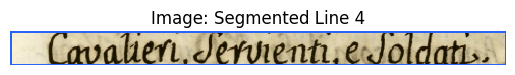

In [19]:
PrintImages(imageLines)

### References:
[1] ComputerVisionPro. (n.d.). Line and Text Segmentation. GitHub repository. [Online] Available: https://github.com/computervisionpro/yt/blob/main/line-text-segmentation/tutorial20.ipynb [Accessed 24-04-2023]